<a href="https://colab.research.google.com/github/lukkychan/resolution_changer/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install required modules

In [ ]:
!pip3 install pytube

In [ ]:
!pip install moviepy imageio

Creating folders

In [10]:
!mkdir Data
!mkdir -p Data/Videos/
!mkdir -p Data/frames/1080p
!mkdir -p Data/frames/144p

Download th youtube videos

In [ ]:
import pytube


# Specify the YouTube video URL
video_url = "https://www.youtube.com/watch?v=O5LW6HABcRA&pp=ygUQcmFkaGVzaHlhbSBzb25ncw%3D%3D"

# Create a YouTube object to access video details
youtube = pytube.YouTube(video_url)

# Get the available video streams
video_streams = youtube.streams.filter(file_extension='mp4').all()

# Print the available video streams and their resolutions
for i, stream in enumerate(video_streams):
    print(f"{i+1}. Resolution: {stream.resolution}, Format: {stream.mime_type}")

# Specify the desired resolution (e.g., "720p")
desired_resolution = "1080p"

# Find the stream with the desired resolution
selected_stream = None
for stream in video_streams:
    if stream.resolution == desired_resolution:
        selected_stream = stream
        break

# Download the video with the selected stream
if selected_stream is not None:
    print(f"\nDownloading video with {selected_stream.resolution} resolution...")
    selected_stream.download(output_path="/content/Data/Videos/")
    print("Video downloaded successfully!")
else:
    print("Desired resolution not found. Please select another resolution.")


Creating frames

In [ ]:
import cv2

# Specify the path to the video file
video_path = "/content/Data/Videos/1080p.mp4"

# Specify the output folder to save the frames
output_folder = "/content/Data/frames/1080p/"

# Specify the maximum number of frames to extract
max_frames = 50

# Open the video file
video = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the frame interval to evenly sample the frames
frame_interval = max(total_frames // max_frames, 1)

# Initialize a counter to keep track of the extracted frames
frame_count = 0

# Loop through the frames and extract the desired number of frames
while frame_count < max_frames:
    # Read the current frame
    ret, frame = video.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Save the frame as an image file
    frame_path = f"{output_folder}frame_{frame_count}.jpg"
    cv2.imwrite(frame_path, frame)

    # Increment the frame count
    frame_count += 1

    # Move to the next frame based on the frame interval
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_count * frame_interval)

# Release the video capture object
video.release()


Total count of frames in video

In [ ]:
import cv2

# Specify the path to the input video file
input_video_path = "/content/Data/Videos/1080p.mp4"

# Open the video file
video = cv2.VideoCapture(input_video_path)

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Print the total number of frames
print(f"Total frames in the video: {total_frames}")

# Release the video file
video.release()


Total frames in the video: 5909


remove audio and make frames

In [ ]:
# reomove audio and make frames
from moviepy.editor import VideoFileClip
import imageio
# Specify the path to the input video file
input_video_path = "/content/Data/Videos/1080p.mp4"

# Specify the path to save the output video without audio
output_video_path = "/content/Data/Videos_nosound/1080p.mp4"

# Specify the path to save the extracted frames
output_frames_path = "/content/Data/frames/1080/"

# Load the video clip
video_clip = VideoFileClip(input_video_path)

# Remove the audio from the video
#video_clip_without_audio = video_clip.without_audio()

# Save the video without audio
#video_clip_without_audio.write_videofile(output_video_path)

# Extract frames from the video
#frames = video_clip_without_audio.iter_frames()
frames = video_clip.iter_frames()

# Save each frame as an image
for i, frame in enumerate(frames):
    frame_path = output_frames_path + f"frame_{i}.jpg"
    imageio.imwrite(frame_path, frame)
    print(f"Frame {i} saved as {frame_path}")


Checking file exists or not

In [ ]:
import os

# Specify the folder path
folder_path = "/path/to/folder"

# Specify the file name to check
file_name = "example.txt"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Check if the file exists in the folder
if file_name in files:
    print(f"The file '{file_name}' exists in the folder.")
else:
    print(f"The file '{file_name}' does not exist in the folder.")


creating models

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import os

In [ ]:
# Define the super-resolution model architecture
def create_super_resolution_model():
    model = tf.keras.Sequential()

    # Add convolutional layers for feature extraction
    model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(None, None, 3)))
    model.add(layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

    # Add upsampling layers for increasing resolution
    model.add(layers.Conv2DTranspose(32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(3, kernel_size=3, activation='relu', padding='same'))

    return model

# Create an instance of the super-resolution model
model = create_super_resolution_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Load and preprocess your high-resolution and low-resolution image data
# X_train: low-resolution images, y_train: corresponding high-resolution images
# Make sure your data is properly preprocessed and normalized

# Define the paths to your high-resolution and low-resolution image datasets
high_res_dir = "/content/Data/frames/1080p/"
low_res_dir = "/content/Data/frames/144p/"

# Define the dimensions of your low-resolution images
low_res_width, low_res_height = 256, 144

# Load and preprocess the image data
import os

def load_and_preprocess_images(high_res_dir, low_res_dir, low_res_width, low_res_height):
    high_res_images = []
    low_res_images = []

    high_res_files = os.listdir(high_res_dir)
    low_res_files = os.listdir(low_res_dir)

    # Load high-resolution and low-resolution images
    for high_res_file, low_res_file in zip(high_res_files, low_res_files):
        high_res_path = os.path.join(high_res_dir, high_res_file)
        low_res_path = os.path.join(low_res_dir, low_res_file)

        high_res_image = Image.open(high_res_path)
        low_res_image = Image.open(low_res_path)

        # Resize the high-resolution image
        high_res_image = high_res_image.resize((low_res_width, low_res_height))

        # Resize the low-resolution image
        #low_res_image = low_res_image.resize((low_res_width, low_res_height))

        # Convert images to arrays
        high_res_image = img_to_array(high_res_image)
        low_res_image = img_to_array(low_res_image)

        high_res_images.append(high_res_image)
        low_res_images.append(low_res_image)

    # Convert the lists to numpy arrays
    high_res_images = np.array(high_res_images)
    low_res_images = np.array(low_res_images)

    # Normalize the image data to values between 0 and 1
    high_res_images = high_res_images / 255.0
    low_res_images = low_res_images / 255.0

    return high_res_images, low_res_images



# Call the function to load and preprocess the image data
X_train, y_train = load_and_preprocess_images(high_res_dir, low_res_dir, low_res_width, low_res_height)

# Train the model using the high-resolution and low-resolution images
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2)

# Specify the path to save the trained model
save_path = "/content/Data/model.h5"

# Save the trained model
model.save(save_path)


Loading the model and predicting

In [ ]:
# Load the trained model
model = tf.keras.models.load_model("/content/Data/model.h5")

# Path to the low-resolution input image
input_image_path = "/content/Data/frames/144p/frame_10.jpg"

# Desired dimensions of the low-resolution image
low_res_width, low_res_height = 64,64

# Load and resize the low-resolution input image
input_image = Image.open(input_image_path)
print(input_image)
input_image = input_image.resize((low_res_width, low_res_height))

# Convert the input image to a numpy array
input_image = tf.keras.preprocessing.image.img_to_array(input_image)

# Preprocess the input image by normalizing it to values between 0 and 1
input_image = input_image / 255.0
print(input_image)

# Reshape the input image to match the model's input shape
input_image = tf.expand_dims(input_image, axis=0)

# Feed the preprocessed low-resolution image into the trained model
predicted_image = model.predict(input_image)

# Rescale the predicted image back to the original high-resolution dimensions
predicted_image = tf.image.resize(predicted_image, (1080, 1920))

# Convert the predicted image to a numpy array
predicted_image = tf.squeeze(predicted_image, axis=0).numpy()
print(predicted_image.astype("uint8"))
# Post-process the predicted image if necessary
# ...

# Display or save the predicted high-resolution image
predicted_image = Image.fromarray(predicted_image.astype("uint8"))

#predicted_image.show()
predicted_image.save("/content/Data/image.jpg")


In [ ]:
import tensorflow as tf
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("path_to_your_trained_model.h5")

# Path to the low-resolution input image
input_image_path = "path_to_your_low_resolution_image.jpg"

# Desired dimensions of the low-resolution image
low_res_width, low_res_height = 64, 64

# Load and resize the low-resolution input image
input_image = Image.open(input_image_path)
input_image = input_image.resize((low_res_width, low_res_height))

# Convert the input image to a numpy array
input_image = tf.keras.preprocessing.image.img_to_array(input_image)

# Preprocess the input image by normalizing it to values between 0 and 1
input_image = input_image / 255.0

# Reshape the input image to match the model's input shape
input_image = tf.expand_dims(input_image, axis=0)

# Feed the preprocessed low-resolution image into the trained model
predicted_image = model.predict(input_image)

# Rescale the predicted image back to the original high-resolution dimensions
predicted_image = tf.image.resize(predicted_image, (original_high_res_width, original_high_res_height))

# Convert the predicted image to a numpy array
predicted_image = tf.squeeze(predicted_image, axis=0).numpy()

# Post-process the predicted image if necessary
# ...

# Display or save the predicted high-resolution image
predicted_image = Image.fromarray(predicted_image.astype("uint8"))
predicted_image.show()
predicted_image.save("path_to_save_predicted_image.jpg")


cropping images

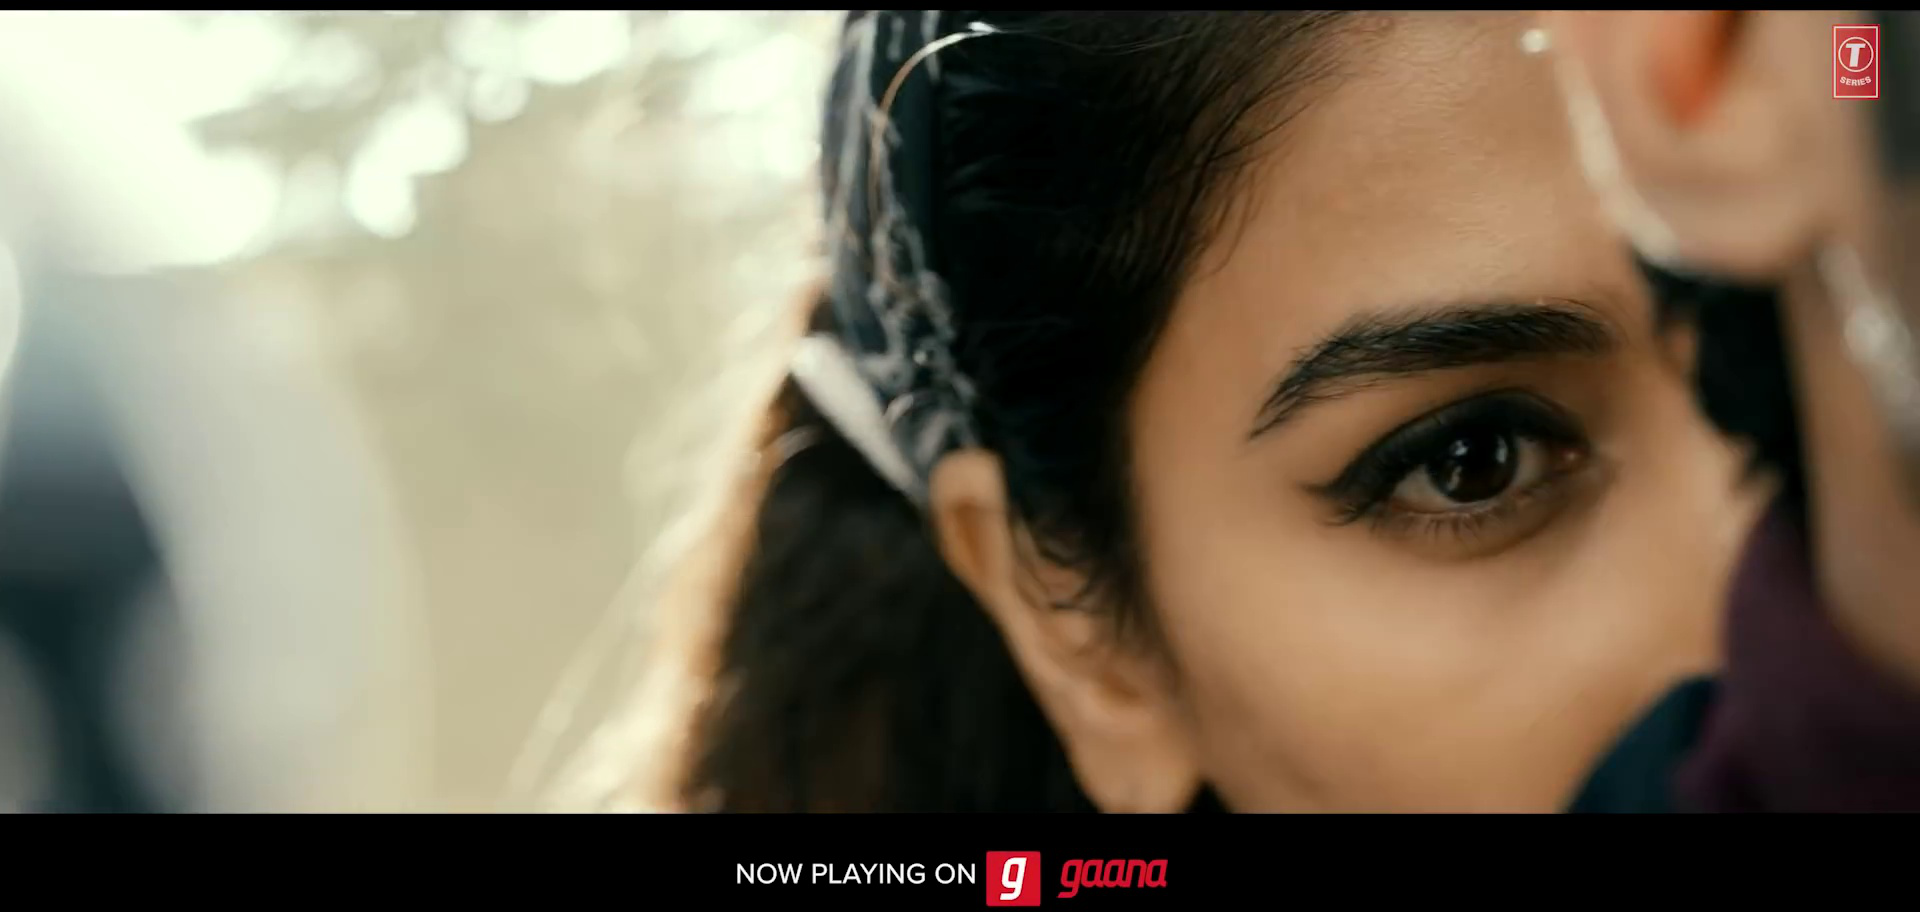

In [9]:
from PIL import Image

def remove_black_borders(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to RGB mode
    image = image.convert("RGB")

    # Find the top-most non-black pixel row
    top_row = None
    for y in range(image.height):
        if any(image.getpixel((x, y)) != (0, 0, 0) for x in range(image.width)):
            top_row = y
            break

    # Find the bottom-most non-black pixel row
    bottom_row = None
    for y in range(image.height-1, -1, -1):
        if any(image.getpixel((x, y)) != (0, 0, 0) for x in range(image.width)):
            bottom_row = y
            break

    if top_row is None or bottom_row is None:
        # No non-black pixels found, return the original image
        return image

    # Crop the image to remove the top and bottom black borders
    cropped_image = image.crop((0, top_row, image.width, bottom_row + 1))

    return cropped_image

# Path to the image with the top and bottom black borders
image_path = "/content/i.jpg"

# Remove the top and bottom black borders from the image
cropped_image = remove_black_borders(image_path)

# Display or save the cropped image
cropped_image.show()
cropped_image.save("/content/cropped_image.jpg")
